# Practica 3

In [63]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA




%matplotlib inline

## Parte 1: Normalizamos el Dataset

In [3]:
#Cargamos el datset pokemon 
pokemonsN = pd.read_csv('./DatasetsLab1/pokemon.csv', encoding='latin-1') 
pokemonsN

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


In [4]:
# Normalizamos los datos
features = pokemonsN.drop(['PokÃ©mon', 'Tipo'], axis=1)
matriz_correlaciones = pokemonsN.corr()
autovalores, autovectores = np.linalg.eig(matriz_correlaciones)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(scaled_features)

pokemonsE = pd.DataFrame(normalized_features, columns=features.columns)
pokemonsE['PokÃ©mon'] = pokemonsN['PokÃ©mon']
pokemonsE['Tipo'] = pokemonsN['Tipo']
pokemonsE # dataset normalizado 


,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad,PokÃ©mon,Tipo
0,0.333333,0.50,0.333333,0.666667,0.333333,0.75,TYPHLOSION,Fuego
1,0.333333,0.50,0.333333,0.000000,0.333333,0.50,PONYTA,Fuego
2,0.333333,0.50,1.000000,0.333333,0.333333,0.00,TORKOAL,Fuego
3,0.666667,1.00,0.666667,0.666667,0.666667,0.75,ARCANINE,Fuego
4,0.333333,0.50,0.666667,0.666667,0.333333,0.75,STARMIE,Agua
5,0.666667,0.75,0.666667,1.000000,0.666667,0.75,PALKIA,Agua
6,0.666667,0.25,0.333333,0.666667,0.666667,0.50,MILOTIC,Agua
7,0.666667,0.25,0.333333,0.000000,0.333333,0.25,AZUMARILL,Agua
8,0.333333,0.75,1.000000,0.000000,0.333333,0.50,LEAFEON,Planta
9,0.666667,0.50,0.333333,0.333333,0.333333,0.25,ABOMASNOW,Planta


## Parte 2: Calculamos los autovalores y autovectores a partir de la matriz de covarianza

In [5]:
covariance_matrix = pokemonsE.cov()

In [6]:
autovalores, autovectores = np.linalg.eig(matriz_correlaciones)

### Obtenemos un dataframe con estos datos

#### Ordenar los autovalores de mayor a menor

In [7]:
sorted_idx = np.argsort(autovalores)[::-1]
sorted_eigenvalues = autovalores[sorted_idx]

#### Calcular el porcentaje de varianza explicado por cada componente principal y el acumulado

In [8]:
explained_variance_ratio = sorted_eigenvalues / sum(sorted_eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

#### Crear un DataFrame con los resultados

In [9]:
mvarianza = pd.DataFrame({'Componente': range(1, len(autovalores)+1),
                            'Porcentaje de Varianza': explained_variance_ratio*100,
                            'Porcentaje Acumulado de Varianza': cumulative_variance_ratio*100})

In [10]:
mvarianza

,Componente,Porcentaje de Varianza,Porcentaje Acumulado de Varianza
0,1,41.641341,41.641341
1,2,24.552140,66.193481
2,3,12.363041,78.556522
3,4,11.329090,89.885612
4,5,7.514464,97.400076
5,6,2.599924,100.000000


Esta información nos indica cuánta información contiene cada componente del dataset. El porcentaje acumulado de varianza nos dice cuánta información tenemos en total. Por ejemplo, si solo usamos 1 componente, tendremos el 41.64% de la información. Si usamos 2 componentes, tendremos el 66.19%. Si usamos 5 componentes, tendremos el 97.4% de la información.

El porcentaje de varianza nos indica cuánta información está contenida en cada componente. Por ejemplo, la componente 1 tiene el 41.64% de información, mientras que la componente 3 tiene el 12.36% de información.

Con dos componentes perdemos el 100 - 66.19, es decir, el 33.90% de información. 
Con tres componentes presentamos el 78.55% de la información

# Parte 3: Representación gráfica

In [58]:
# imprimimos cada autovalor con su componente para saber que componentes influyen mas
for i, autovalor in enumerate (autovalores):
    print(f"El autovalor {autovalor} corresponde a la componente {i+1}")

El autovalor 2.4984804690833533 corresponde a la componente 1
El autovalor 1.4731283970841145 corresponde a la componente 2
El autovalor 0.15599543135461838 corresponde a la componente 3
El autovalor 0.4508678514211406 corresponde a la componente 4
El autovalor 0.6797453746803387 corresponde a la componente 5
El autovalor 0.741782476376435 corresponde a la componente 6


Vemos que las dos componentes que influyen más son la componente 1 y la componente 2

#### Creamos un nuevo dataset con las dos componentes de interés y además añadimos una columna llamada "Atributos".

In [47]:

new_dataset = np.concatenate((autovectores[:,0].reshape(-1,1), autovectores[:,1].reshape(-1,1)), axis=1)

# Convertir el array en una lista y seleccionar las dos primeras columnas de cada fila
new_list = [row[:2] for row in autovectores.tolist()]

# Crear el nuevo dataset
autovectoresComponentes = pd.DataFrame(new_list, columns=['Componente 1', 'Componente 2'])

autovectoresComponentes["Atributos"] = ""
autovectoresComponentes.loc[0, "Atributos"] = "PS"
autovectoresComponentes.loc[1, "Atributos"] = "Ataque"
autovectoresComponentes.loc[2, "Atributos"] = "Defensa"
autovectoresComponentes.loc[3, "Atributos"] = "Ataque Especial"
autovectoresComponentes.loc[4, "Atributos"] = "Defensa Especial"
autovectoresComponentes.loc[5, "Atributos"] = "Velocidad"
autovectoresComponentes

,Componente 1,Componente 2,Atributos
0,0.454541,0.158473,PS
1,0.450729,-0.251981,Ataque
2,0.318823,-0.632008,Defensa
3,0.423317,0.382280,Ataque Especial
4,0.480989,-0.168522,Defensa Especial
5,0.279357,0.580880,Velocidad


#### Mostramos la gráfica

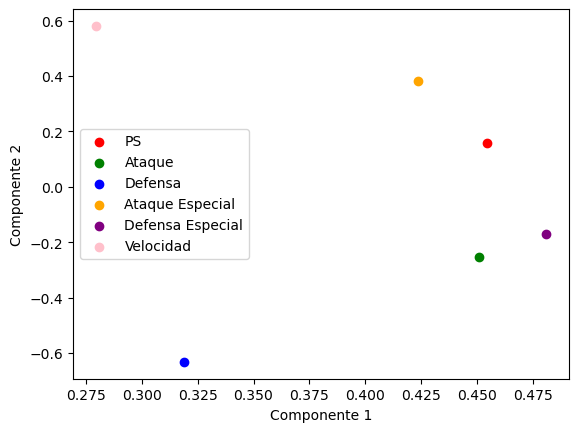

In [57]:
# Definir los colores para cada atributo
colors = {'PS': 'red', 'Ataque': 'green', 'Defensa': 'blue', 'Ataque Especial': 'orange', 
          'Defensa Especial': 'purple', 'Velocidad': 'pink'}

# Hacer el scatterplot
fig, ax = plt.subplots()
for atributo in autovectoresComponentes['Atributos'].unique():
    x = autovectoresComponentes[autovectoresComponentes['Atributos'] == atributo]['Componente 1']
    y = autovectoresComponentes[autovectoresComponentes['Atributos'] == atributo]['Componente 2']
    ax.scatter(x, y, c=colors[atributo], label=atributo)

# Configurar el gráfico
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.legend()
plt.show()

Podemos observar en esta gráfica que el ataque (verde) y la defensa especial (morado) están altamente correlacionados. También podemos observar que la defensa (azul) y el ataque especial (naranja) no tienen una relación significativa.